In [12]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

In [13]:
data = pd.read_csv("drug200.csv")

In [14]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [16]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [17]:
data["Drug"].value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
encoder = LabelEncoder()
data["Sex"] = encoder.fit_transform(data["Sex"])
data["BP"] = encoder.fit_transform(data["BP"])
data["Cholesterol"] = encoder.fit_transform(data["Cholesterol"])
data["Drug"] = encoder.fit_transform(data["Drug"])

In [20]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [21]:
data["Drug"].value_counts()

Drug
0    91
4    54
1    23
3    16
2    16
Name: count, dtype: int64

In [22]:
data.corr()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
Age,1.000000,0.102027,0.054212,-0.068234,-0.063119,0.041856
Sex,0.102027,1.000000,-0.007814,-0.008811,-0.125008,0.018239
BP,0.054212,-0.007814,1.000000,-0.137552,-0.149312,0.419397
Cholesterol,-0.068234,-0.008811,-0.137552,1.000000,0.010000,0.048415
Na_to_K,-0.063119,-0.125008,-0.149312,0.010000,1.000000,-0.689051
Drug,0.041856,0.018239,0.419397,0.048415,-0.689051,1.000000


In [24]:
x = data.drop("Drug", axis=1)
y = data["Drug"]

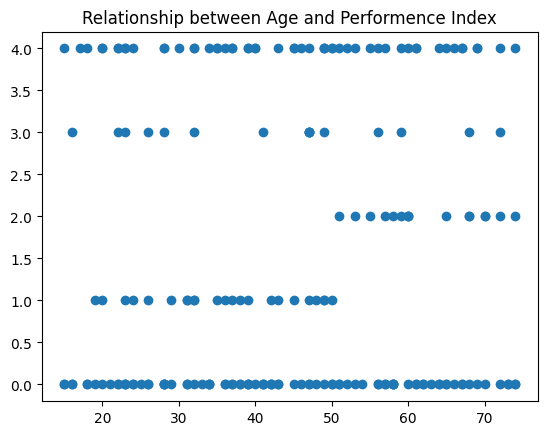

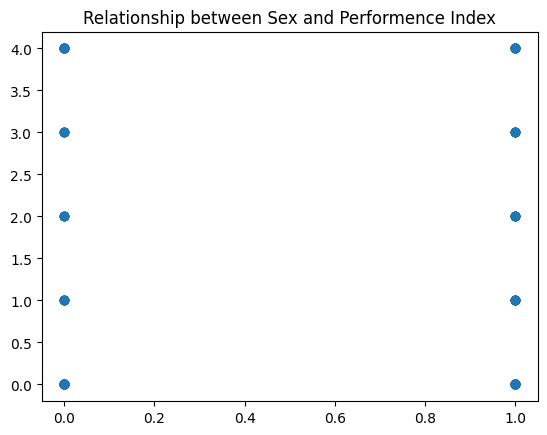

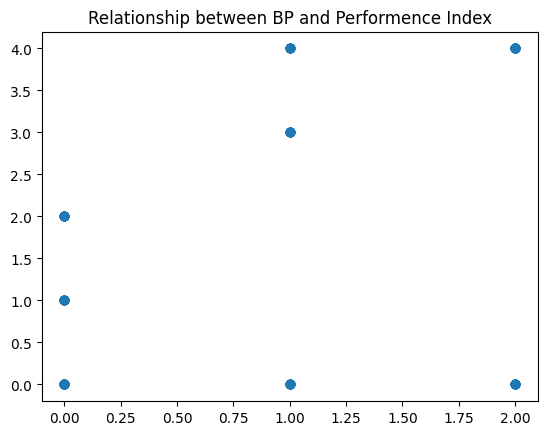

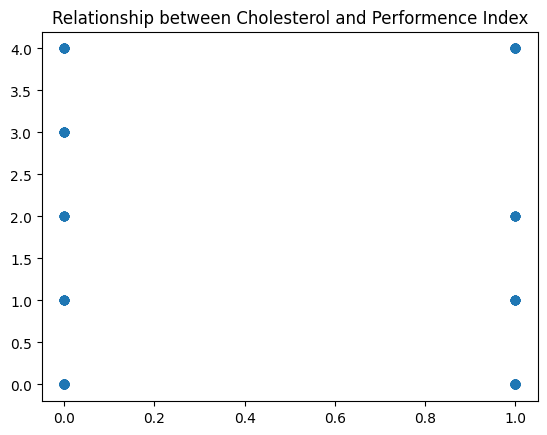

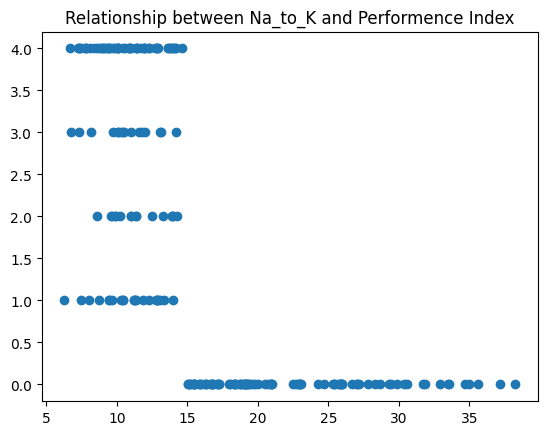

In [25]:
for coln in x:
    plt.scatter(x[coln], y)
    plt.title(f"Relationship between {coln} and Performence Index")
    plt.show()

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_Scaled = scaler.fit_transform(X_test)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
model = LogisticRegression(class_weight = "balanced", random_state = 42)

model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [33]:
y_pred = model.predict(X_test_Scaled)

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
import seaborn as sns

In [36]:
accuracy_score(y_test, y_pred)

0.925

In [38]:
confusion_metrics = confusion_matrix(y_test, y_pred)

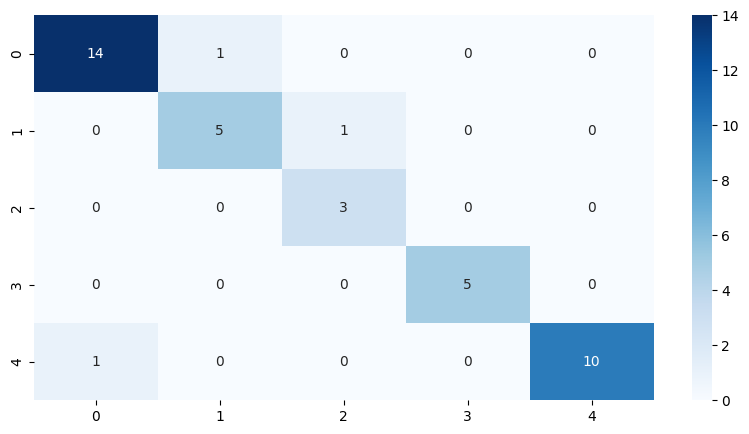

In [40]:
plt.figure(figsize = (10,5))
sns.heatmap(confusion_metrics, annot = True, fmt = "d", cmap = "Blues")
plt.show()

In [47]:
input_text = (0.39732505, 0.95118973, 0.23718595, 0.77459667, 2.52701934)
np_df = np.asarray(input_text)
predictions = model.predict(np_df.reshape(1, -1))

if predictions == 0:
    print("Drug Y")
elif predictions == 1:
    print("Drug A")
elif predictions == 2:
    print("Drug B")
elif predictions == 3:
    print("Drug B")
else:
    print("Drug X")
    

Drug Y


In [46]:
X_test_Scaled[4]

array([0.39732505, 0.95118973, 0.23718595, 0.77459667, 2.52701934])

In [43]:
y_pred

array([4, 1, 4, 3, 0, 0, 0, 4, 1, 4, 1, 4, 0, 1, 2, 0, 2, 4, 3, 0, 2, 4,
       4, 0, 0, 0, 3, 4, 0, 0, 0, 3, 3, 0, 2, 0, 4, 1, 0, 1])